In [12]:
using Plots

In [13]:
nx = 161 # then try to change this
l = 8 # length of the domain
dx = l / (nx-1)
nt = 250 # number of timesteps
dt = 0.025 # stepsize
c = 1 # wave speed in the simple convection equation

1

In [14]:
# u_0 is defined as a step function
u = ones(nx)
u[convert(Integer, 0.5/dx): convert(Integer, 1/dx + 1)] .= 2;

In [15]:
un = ones(nt,nx,2)
un[1, :, 2] = copy(u)
un[1, :, 1] = copy(u)
for n in 1:nt-1, i in 2:nx
    un[n+1,i,2] = un[n, i,2] - un[n,i,2] * dt / dx * (un[n, i,2] - un[n,i-1,2])

    un[n+1,i,1] = un[n, i,1] - c * dt / dx * (un[n, i,1] - un[n,i-1,1])
end

┌ Info: Saved animation to /home/fuad/MyCodes/Julia/CFDJulia/tmp.gif
└ @ Plots /home/fuad/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/home/fuad/MyCodes/Julia/CFDJulia/tmp.gif")
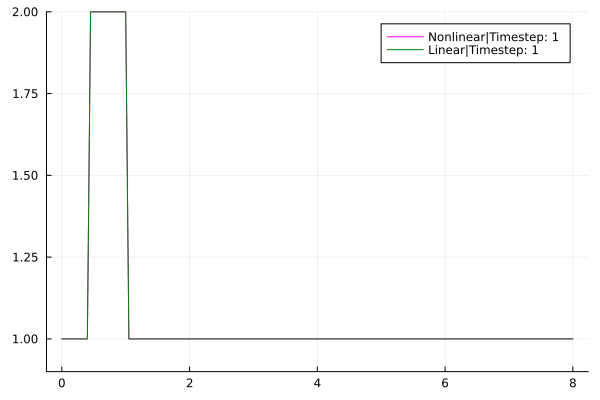

In [17]:
@gif for n ∈ 1:nt
    plot(LinRange(0,l,nx), un[n,:,2], label="Nonlinear|Timestep: $n", ylims=(0.9,2), linecolor = :magenta);

    plot!(LinRange(0,l,nx), un[n,:,1], label="Linear|Timestep: $n", ylims=(0.9,2), linecolor = :green);
end